# A CHAT BOT


In [4]:
!pip install nlp_utils

In [5]:
import nltk
import numpy as np
import pandas as pd
import random
import string
import nlp_utils as nu
import matplotlib.pyplot as plt



In [6]:
f = open('dialogs.txt','r')
print(f.read())

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [7]:
df = pd.read_csv('dialogs.txt', names = ('Query', 'Response'), sep = ('\t'))


In [8]:
df

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


## Data Understanding


In [9]:
df.shape

(3725, 2)

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [11]:
df.columns

Index(['Query', 'Response'], dtype='object')

In [12]:
df.nunique()

Query       3510
Response    3512
dtype: int64

In [13]:
df.describe()

,Query,Response
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [14]:
df.isnull().sum()

Query       0
Response    0
dtype: int64

In [15]:
df.duplicated().sum()

1

In [16]:
df['Response'].value_counts()

Response
what do you mean?                                                       22
why not?                                                                16
what happened?                                                          10
why is that?                                                             9
of course.                                                               8
                                                                        ..
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
mi stands for middle initial.                                            1
start typing instead. that way your left hand will do half the work.     1
Name: count, Length: 3512, dtype: int64

In [17]:
df['Query'].value_counts()

Query
what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
me too.                                         7
                                               ..
you can yell at them.                           1
and they will yell back at you.                 1
yelling doesn't do any good.                    1
will you look at this form?                     1
but i do all my writing with my right hand.     1
Name: count, Length: 3510, dtype: int64

## Data Visualization

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [19]:
Test = df['Query']

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [21]:
sid = SentimentIntensityAnalyzer()
for sentence in Test:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Streaming output truncated to the last 5000 lines.
of course i heard that. i thought a plane had crashed into your house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
it wasn't that loud.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
i will blow my nose sometime for you, and you'll see.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
okay. i'll take your word for it.
compound: 0.2263, neg: 0.0, neu: 0.759, pos: 0.241, 
i thought you had an elephant in your house.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
you're funny.
compound: 0.4404, neg: 0.0, neu: 0.256, pos: 0.744, 
what did you say? i think i've gone deaf.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
i have lots of friends.
compound: 0.4767, neg: 0.0, neu: 0.492, pos: 0.508, 
really? how many do you have?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
i don't know, maybe one hundred.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
that is a lot of friends. do you have a best friend?
compound: 0.8885, neg: 0.0, neu: 0.4, pos: 0.6,

In [22]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Test.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

In [23]:
from wordcloud import WordCloud

In [24]:
def wordcloud(df, label):

    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="black",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud

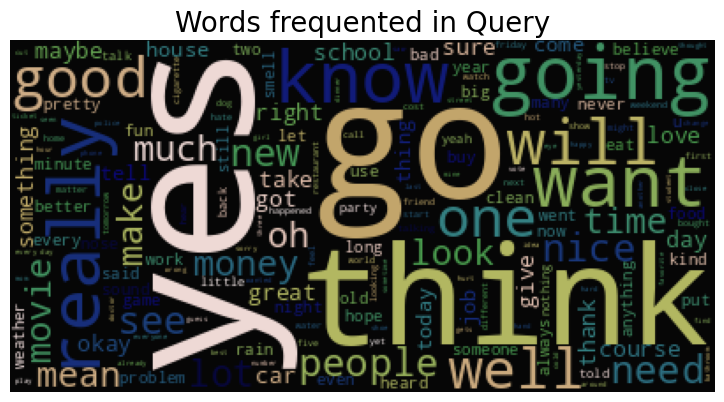

In [25]:
wordcloud(df,'Query')

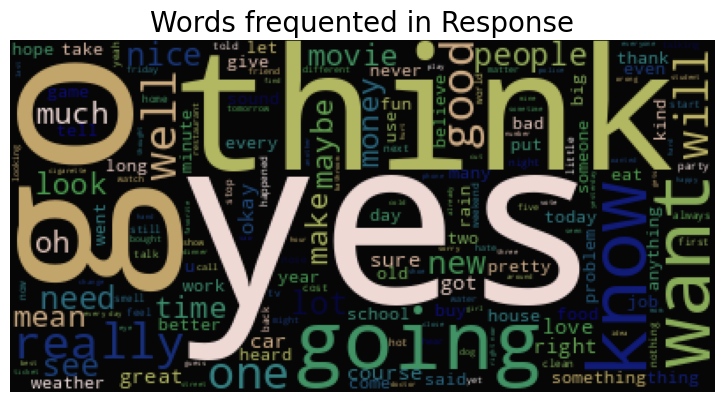

In [26]:
wordcloud(df,'Response')

##Text Normalization

In [27]:
#Removinf special character
import re

In [28]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation),'',x.lower())

In [29]:
# removing \n and replacing them with empty value
remove_n = lambda x: re.sub('\n',' ',x)

In [30]:
from os import remove
# removing asci character
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ',x)

In [31]:
# removing alpha numeric values
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

In [32]:
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii )

In [33]:
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii )

In [34]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,im fine how about yourself,0.000,1.000,0.000,0.0000
1,im fine how about yourself,im pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,im pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,ive been great what about you,0.495,0.505,0.000,-0.5994
4,ive been great what about you,ive been good im in school right now,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,thats a good question maybe its not old age,are you righthanded,0.000,0.707,0.293,0.4404
3721,are you righthanded,yes all my life,0.000,1.000,0.000,0.0000
3722,yes all my life,youre wearing out your right hand stop using i...,0.000,0.526,0.474,0.4019
3723,youre wearing out your right hand stop using i...,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


In [35]:
pd.set_option('display.max_colwidth', 3000)

In [36]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,im fine how about yourself,0.000,1.000,0.000,0.0000
1,im fine how about yourself,im pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,im pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,ive been great what about you,0.495,0.505,0.000,-0.5994
4,ive been great what about you,ive been good im in school right now,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,thats a good question maybe its not old age,are you righthanded,0.000,0.707,0.293,0.4404
3721,are you righthanded,yes all my life,0.000,1.000,0.000,0.0000
3722,yes all my life,youre wearing out your right hand stop using it so much,0.000,0.526,0.474,0.4019
3723,youre wearing out your right hand stop using it so much,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


##Importance Sentence

In [37]:
imp_sent=df.sort_values(by='compound', ascending=False)

In [38]:
imp_sent.head()

,Query,Response,neg,neu,pos,compound
1019,if we are good we will be happy in heaven with god,thats what many people believe,0.0,0.400,0.600,0.9001
565,yeah it sounds like its going to be the best party of the year,exactly it seems like its going to be loads of fun,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best friend,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3414,well thats okay as long as it helps him relax and think more clearly,yes we need a relaxed president who thinks clearly,0.0,0.419,0.581,0.8883
3470,so its better to save money than to have an honest election,well the democratic party says it was an honest election,0.0,0.482,0.518,0.8651


##Top Positive Sentence

In [39]:
pos_sent = df.sort_values(by='pos', ascending=False)

In [40]:
pos_sent.head()

,Query,Response,neg,neu,pos,compound
1659,please,you know the rules,0.0,0.0,1.0,0.3182
1191,yes,no thats incomplete,0.0,0.0,1.0,0.4019
223,well congratulations,thank you,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these freeways,0.0,0.0,1.0,0.3612
3583,sure,thank you,0.0,0.0,1.0,0.3182


##Top Negative Sentence

In [41]:
neg_sent = df.sort_values(by='neg', ascending=False)

In [42]:
neg_sent.head()

,Query,Response,neg,neu,pos,compound
1294,no,how do you know,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
154,no problem,did you need something,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


##Top Netural Sentence

In [43]:
neu_sort = df.sort_values(by='neu', ascending=False)

In [44]:
neu_sort.head()

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,im fine how about yourself,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,oh thats so delicious,0.0,1.0,0.0,0.0
1596,what is gravity,its the force that pulls everything down,0.0,1.0,0.0,0.0
1597,its the force that pulls everything down,i dont understand,0.0,1.0,0.0,0.0
1598,i dont understand,if you pour water into a glass the water goes down into the glass,0.0,1.0,0.0,0.0


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# importing tfidf vectorizer

In [46]:
tfidf = TfidfVectorizer()
# Word Embedding - TF-IDF

In [47]:
factors = tfidf.fit_transform(df['Query']).toarray()
# changing column into array

In [48]:
feature_names = tfidf.get_feature_names_out()

##Application

In [49]:

from sklearn.metrics.pairwise import cosine_distances

In [53]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')



[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [54]:
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    lemmatizer = WordNetLemmatizer()
    query = lemmatizer.lemmatize(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [55]:
while True:
    query = input('USER: ')
    if query == 'exit':
        break

    response = chatbot(query)
    if response['score'] <= 0.2: #
        print('BOT: Please rephrase your Question.')

    else:
        print('='*80)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('='*80)
        print('BOT: ',response['response'])

USER: hi
logs:
 Matched Question: 'hi how are you doing'
 Confidence Score: 67.93 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  im fine how about yourself
USER: sad
logs:
 Matched Question: 'thats sad but have you gone to the movies recently'
 Confidence Score: 48.36 
 PositiveScore: 0.0 
 NegativeScore: 0.186
 NeutralScore: 0.814
BOT:  thats a switch
USER: not good
logs:
 Matched Question: 'thats not good'
 Confidence Score: 82.97 
 PositiveScore: 0.0 
 NegativeScore: 0.546
 NeutralScore: 0.454
BOT:  no it isnt he almost died when he was little
USER: exit
